# Importing Libraries

In [1]:
from fitizens_libraries.load_and_process_training_data import load_training_data
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pycaret.classification import *

# Creating Auxiliary Functions


In [2]:
def create_custom_dataframe(series):
    df =  series[['linAccX', 'linAccY', 'linAccZ', 'gyroX',
                'gyroY', 'gyroZ', 'accX_mod', 'accY_mod', 'accZ_mod', 'gyroX_mod',
                'gyroY_mod', 'gyroZ_mod', 'magnX_mod', 'magnY_mod', 'magnZ_mod',
                'linAccX_mod', 'linAccY_mod', 'linAccZ_mod']]
    return df

In [3]:
def create_training_data_stats(df, target):
    stats_dict = {}
    series = create_custom_dataframe(df)
    
    for column in series.columns:
        mean = series[column].mean()
        std = series[column].std()
        median = series[column].median()
        skewness = series[column].skew()
        kurtosis = series[column].kurtosis()

       # min_val = series[column].min()
      #  max_val = series[column].max()
      #  range_val = max_val - min_val
      #  quartile_25 = np.percentile(series[column], 25)
      #  quartile_75 = np.percentile(series[column], 75)
      #  iqr = quartile_75 - quartile_25
    

        stats_dict[f"{column}_mean"] = mean
        stats_dict[f"{column}_std"] = std
        stats_dict[f"{column}_median"] = median
        stats_dict[f"{column}_skewness"] = skewness
        stats_dict[f"{column}_kurtosis"] = kurtosis

       # stats_dict[f"{column}_min"] = min_val
       # stats_dict[f"{column}_max"] = max_val
       # stats_dict[f"{column}_range"] = range_val
      #  stats_dict[f"{column}_quartile_25"] = quartile_25
       # stats_dict[f"{column}_quartile_75"] = quartile_75
       # stats_dict[f"{column}_iqr"] = iqr
        
        
    stats_dict["target"] = target
    return stats_dict

# Loading Data

In [4]:
folder_path = "DUMBBELL"
os.makedirs(folder_path, exist_ok=True)
file_names = [f"{folder_path}/{name}" for name in os.listdir(folder_path)]
signals = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'magnX', 'magnY', 'magnZ', 'linAccX', 'linAccY', 'linAccZ']

data, wk = load_training_data(filelist=file_names,
                         signals= signals,
                          target_exercise="DUMBBELL_SNATCH", other_exercises=[], is_peak_minima=True)
data[0]

{'series':                          accX_orig  accY_orig  accZ_orig  gyroX_orig  \
 time                                                                   
 1970-01-01 00:00:02.435   1.060058   3.711400  -1.291248  114.240005   
 1970-01-01 00:00:02.444   1.016986   3.555861  -1.188353  113.190002   
 1970-01-01 00:00:02.453   1.040915   3.407501  -0.896418  113.750000   
 1970-01-01 00:00:02.462   1.083987   3.256748  -0.862917  109.760002   
 1970-01-01 00:00:02.471   1.452495   3.259141  -1.176388  106.050003   
 ...                            ...        ...        ...         ...   
 1970-01-01 00:00:03.709   0.921270   6.061236  -1.164424 -153.860001   
 1970-01-01 00:00:03.718   1.201240   5.412758  -0.633198 -153.230011   
 1970-01-01 00:00:03.727   1.213204   5.769301  -0.860524 -149.310013   
 1970-01-01 00:00:03.736   1.246705   5.051429  -1.492252 -153.580002   
 1970-01-01 00:00:03.745   1.399851   3.950691  -1.233818 -150.920013   
 
                          gyroY_orig  g

In [5]:
from custom_libraries.merge_data import merge_data

In [6]:
df = merge_data(data)

In [7]:
df.columns

Index(['accX_orig', 'accY_orig', 'accZ_orig', 'gyroX_orig', 'gyroY_orig',
       'gyroZ_orig', 'magnX_orig', 'magnY_orig', 'magnZ_orig', 'linAccX_orig',
       'linAccY_orig', 'linAccZ_orig', 'exercising_periods', 'accX', 'accY',
       'accZ', 'gyroX', 'gyroY', 'gyroZ', 'magnX', 'magnY', 'magnZ', 'linAccX',
       'linAccY', 'linAccZ', 'accX_mod', 'accY_mod', 'accZ_mod', 'gyroX_mod',
       'gyroY_mod', 'gyroZ_mod', 'magnX_mod', 'magnY_mod', 'magnZ_mod',
       'linAccX_mod', 'linAccY_mod', 'linAccZ_mod', 'peaks', 'first_sample',
       'last_sample', 'first_sample_closest_peak', 'last_sample_closest_peak'],
      dtype='object')

In [8]:
columns_to_keep = [
    'accX', 'accY', 'accZ', 'linAccX', 'linAccY', 'linAccZ',
    'gyroX', 'gyroY', 'gyroZ', 'accX_mod', 'accY_mod', 'accZ_mod',
    'gyroX_mod', 'gyroY_mod', 'gyroZ_mod', 'magnX_mod', 'magnY_mod',
    'magnZ_mod', 'linAccX_mod', 'linAccY_mod', 'linAccZ_mod'
]

# Remove columns not in the list of columns_to_keep
df = df[columns_to_keep]

In [9]:
df.columns

Index(['accX', 'accY', 'accZ', 'linAccX', 'linAccY', 'linAccZ', 'gyroX',
       'gyroY', 'gyroZ', 'accX_mod', 'accY_mod', 'accZ_mod', 'gyroX_mod',
       'gyroY_mod', 'gyroZ_mod', 'magnX_mod', 'magnY_mod', 'magnZ_mod',
       'linAccX_mod', 'linAccY_mod', 'linAccZ_mod'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 477442 entries, 1970-01-01 00:00:02.435000 to 1970-01-03 11:25:58.372000
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   accX         477442 non-null  float64
 1   accY         477442 non-null  float64
 2   accZ         477442 non-null  float64
 3   linAccX      477442 non-null  float64
 4   linAccY      477442 non-null  float64
 5   linAccZ      477442 non-null  float64
 6   gyroX        477442 non-null  float64
 7   gyroY        477442 non-null  float64
 8   gyroZ        477442 non-null  float64
 9   accX_mod     477442 non-null  float64
 10  accY_mod     477442 non-null  float64
 11  accZ_mod     477442 non-null  float64
 12  gyroX_mod    477442 non-null  float64
 13  gyroY_mod    477442 non-null  float64
 14  gyroZ_mod    477442 non-null  float64
 15  magnX_mod    477442 non-null  float64
 16  magnY_mod    477442 non-null  float64
 17  magnZ_mod    477442

# Creating new data

In [11]:
data_info = [create_training_data_stats(info["series"], info["target"]) for info in data]
data_custom = pd.DataFrame(data_info)
data_custom.head()

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccY_mean,linAccY_std,linAccY_median,linAccY_skewness,linAccY_kurtosis,...,linAccY_mod_std,linAccY_mod_median,linAccY_mod_skewness,linAccY_mod_kurtosis,linAccZ_mod_mean,linAccZ_mod_std,linAccZ_mod_median,linAccZ_mod_skewness,linAccZ_mod_kurtosis,target
0,-0.010832,0.257759,0.022629,-0.259358,-1.267382,-0.029821,0.504011,-0.162232,0.787207,-0.590745,...,0.279080,0.176604,1.498045,1.694708,11.094434,6.971036,10.790173,0.030190,-1.090500,DUMBBELL_SNATCH
1,-0.034720,0.496607,0.188302,-0.593494,-1.099755,0.214783,0.256087,0.192493,0.198884,-1.322302,...,0.133551,0.037169,1.187884,0.572610,11.948434,7.987296,12.112203,-0.044254,-1.398586,DUMBBELL_SNATCH
2,-0.089612,0.331522,-0.111022,0.004730,-1.457462,0.072488,0.508044,0.152428,0.145134,-0.757957,...,0.302889,0.123084,1.405682,1.055934,11.073051,8.955183,9.759814,0.368915,-1.197811,DUMBBELL_SNATCH
3,-0.089487,0.229731,-0.098626,-0.013492,-1.302630,0.185064,0.438122,0.279522,-0.663503,-0.412833,...,0.206306,0.164230,0.603914,-1.079152,10.049806,8.705312,7.934984,0.510644,-1.157994,DUMBBELL_SNATCH
4,0.001164,0.267506,0.018602,-0.597686,-0.181283,0.015876,0.505773,0.132528,-0.207437,-1.407831,...,0.193750,0.201981,0.412392,-1.155889,8.841498,7.627542,7.327700,0.571699,-0.884836,DUMBBELL_SNATCH


# EDA

In [12]:
data_custom.shape

(3800, 91)

In [13]:
data_custom.isnull().sum()

linAccX_mean            0
linAccX_std             0
linAccX_median          0
linAccX_skewness        0
linAccX_kurtosis        0
                       ..
linAccZ_mod_std         0
linAccZ_mod_median      0
linAccZ_mod_skewness    0
linAccZ_mod_kurtosis    0
target                  0
Length: 91, dtype: int64

In [14]:
data_custom.target.value_counts()

NO_EXERCISE        3182
DUMBBELL_SNATCH     618
Name: target, dtype: int64

In [15]:
corr_matrix = data_custom.drop(columns=["target"],axis=1).corr()
corr_matrix

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccY_mean,linAccY_std,linAccY_median,linAccY_skewness,linAccY_kurtosis,...,linAccY_mod_mean,linAccY_mod_std,linAccY_mod_median,linAccY_mod_skewness,linAccY_mod_kurtosis,linAccZ_mod_mean,linAccZ_mod_std,linAccZ_mod_median,linAccZ_mod_skewness,linAccZ_mod_kurtosis
linAccX_mean,1.000000,-0.322231,0.957296,0.072594,0.044025,-0.043278,0.000438,-0.094300,0.122574,-0.179010,...,-0.027297,-0.080086,0.013267,-0.054394,-0.055298,-0.220689,-0.284375,-0.152059,0.033609,-0.011359
linAccX_std,-0.322231,1.000000,-0.347199,0.055423,-0.127100,0.065830,0.236053,0.031378,0.033743,0.043952,...,0.133681,0.159340,0.033850,0.085268,0.045504,0.313922,0.402140,0.211153,-0.107326,-0.127805
linAccX_median,0.957296,-0.347199,1.000000,-0.133446,0.023020,-0.047782,-0.001546,-0.102819,0.134403,-0.197328,...,-0.027217,-0.094660,0.026492,-0.075797,-0.067996,-0.206426,-0.290892,-0.129878,-0.001577,-0.048377
linAccX_skewness,0.072594,0.055423,-0.133446,1.000000,0.265625,-0.000438,-0.017625,0.004112,0.025048,0.074288,...,-0.026522,0.013748,-0.060210,0.085340,0.045323,-0.096077,-0.010393,-0.130618,0.166912,0.172837
linAccX_kurtosis,0.044025,-0.127100,0.023020,0.265625,1.000000,0.054031,0.049173,0.044530,0.035669,0.186232,...,0.092799,0.130823,0.023847,0.078987,0.084460,0.038476,0.049564,0.050085,0.023946,0.049696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
linAccZ_mod_mean,-0.220689,0.313922,-0.206426,-0.096077,0.038476,0.287396,0.360770,0.251491,-0.002624,0.065234,...,0.485713,0.368172,0.473601,-0.120733,-0.061831,1.000000,0.913748,0.958910,-0.651350,-0.580821
linAccZ_mod_std,-0.284375,0.402140,-0.290892,-0.010393,0.049564,0.311612,0.438241,0.296714,-0.060543,0.164689,...,0.522283,0.489023,0.425927,-0.018850,0.017611,0.913748,1.000000,0.777997,-0.407085,-0.358355
linAccZ_mod_median,-0.152059,0.211153,-0.129878,-0.130618,0.050085,0.221425,0.303515,0.186629,0.017941,0.043334,...,0.429737,0.290800,0.457130,-0.136324,-0.067815,0.958910,0.777997,1.000000,-0.706568,-0.609043
linAccZ_mod_skewness,0.033609,-0.107326,-0.001577,0.166912,0.023946,-0.118136,-0.097410,-0.053975,-0.096372,0.117809,...,-0.210815,-0.060464,-0.280302,0.230093,0.182194,-0.651350,-0.407085,-0.706568,1.000000,0.965004


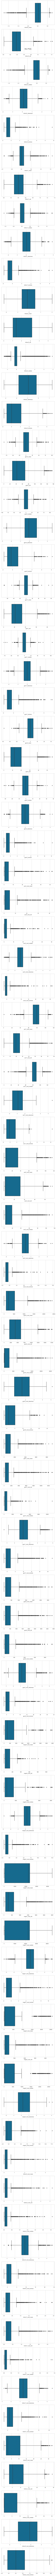

In [16]:
# Create a figure and a set of subplots
df_box = data_custom.drop(columns=["target"],axis=1)
fig, axes = plt.subplots(nrows=len(df_box.columns), ncols=1, figsize=(8, 4 * len(df_box.columns)))

# Create a box plot for each column
for i, col in enumerate(df_box.columns):
    sns.boxplot(x=df_box[col], ax=axes[i])

# Add a title (optional)
fig.suptitle('Box Plots', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# ML with Pycaret

In [17]:
data_dev = data_custom.sample(frac=0.95, random_state=786)
data_prod = data_custom.drop(data_dev.index)

data_dev.reset_index(inplace=True, drop=True)
data_prod.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data_dev.shape))
print('Simulated data For Production ' + str(data_prod.shape))

Data for Modeling: (3610, 91)
Simulated data For Production (190, 91)


In [18]:
model = setup(
    # Basic options
    data = data_dev,
    target = "target",
    train_size = 0.7,
    preprocess = True,
    
    # Dealing with multicollinearity
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.9,
        
    # Feature normalization with outliers
    normalize = True,
    normalize_method = 'robust',
        
    # Paralellization options
    n_jobs = - 1,
    use_gpu = False,
    
    # Imbalance Dataset
    fix_imbalance=True,
    
    # Feature Importance
    feature_selection = True,
    n_features_to_select= 10
)

[LightGBM] [Info] Number of positive: 2122, number of negative: 2122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 4244, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

,Description,Value
0,Session id,5005
1,Target,target
2,Target type,Binary
3,Target mapping,"DUMBBELL_SNATCH: 0, NO_EXERCISE: 1"
4,Original data shape,"(3610, 91)"
5,Transformed data shape,"(5327, 11)"
6,Transformed train set shape,"(4244, 11)"
7,Transformed test set shape,"(1083, 11)"
8,Numeric features,90
9,Preprocess,True


In [19]:
models = compare_models(sort="F1", fold=2)
models

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:16:01
Status,. . . . . . . . . . . . . . . . . .,Fitting 2 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9960,0.9998,0.9962,0.9991,0.9976,0.9854,0.9854,1.6650
ada,Ada Boost Classifier,0.9953,0.9981,0.9972,0.9972,0.9972,0.9824,0.9824,1.6650
rf,Random Forest Classifier,0.9945,0.9995,0.9958,0.9976,0.9967,0.9795,0.9795,7.0050
lightgbm,Light Gradient Boosting Machine,0.9945,0.9994,0.9958,0.9976,0.9967,0.9795,0.9796,2.4700
dt,Decision Tree Classifier,0.9941,0.9885,0.9967,0.9962,0.9965,0.9779,0.9779,16.1500
qda,Quadratic Discriminant Analysis,0.9937,0.9989,0.9953,0.9972,0.9962,0.9766,0.9766,2.3400
gbc,Gradient Boosting Classifier,0.9937,0.9993,0.9948,0.9976,0.9962,0.9766,0.9767,2.7700
xgboost,Extreme Gradient Boosting,0.9937,0.9995,0.9953,0.9972,0.9962,0.9766,0.9766,1.7300
catboost,CatBoost Classifier,0.9937,0.9998,0.9934,0.9991,0.9962,0.9768,0.9770,20.6500
knn,K Neighbors Classifier,0.9933,0.9965,0.9943,0.9976,0.9960,0.9752,0.9752,20.5100


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5005, verbose=0, warm_start=False)

In [20]:
cnt_models_df = pull()
cnt_models_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9960,0.9998,0.9962,0.9991,0.9976,0.9854,0.9854,1.665
ada,Ada Boost Classifier,0.9953,0.9981,0.9972,0.9972,0.9972,0.9824,0.9824,1.665
rf,Random Forest Classifier,0.9945,0.9995,0.9958,0.9976,0.9967,0.9795,0.9795,7.005
lightgbm,Light Gradient Boosting Machine,0.9945,0.9994,0.9958,0.9976,0.9967,0.9795,0.9796,2.470
dt,Decision Tree Classifier,0.9941,0.9885,0.9967,0.9962,0.9965,0.9779,0.9779,16.150
qda,Quadratic Discriminant Analysis,0.9937,0.9989,0.9953,0.9972,0.9962,0.9766,0.9766,2.340
gbc,Gradient Boosting Classifier,0.9937,0.9993,0.9948,0.9976,0.9962,0.9766,0.9767,2.770
xgboost,Extreme Gradient Boosting,0.9937,0.9995,0.9953,0.9972,0.9962,0.9766,0.9766,1.730
catboost,CatBoost Classifier,0.9937,0.9998,0.9934,0.9991,0.9962,0.9768,0.9770,20.650
knn,K Neighbors Classifier,0.9933,0.9965,0.9943,0.9976,0.9960,0.9752,0.9752,20.510


In [21]:
clf = create_model('catboost', fold = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9968,0.9996,0.9972,0.9991,0.9981,0.9883,0.9883
1,0.9929,0.9998,0.9925,0.9991,0.9957,0.9738,0.9740
Mean,0.9949,0.9997,0.9948,0.9991,0.9969,0.9811,0.9812
Std,0.0020,0.0001,0.0024,0.0000,0.0012,0.0072,0.0071


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## REGULARITZATION

Documentation: https://catboost.ai/en/docs/concepts/python-reference_catboost

In [22]:
params_grid = {
    'iterations': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'depth': [3, 5, 7, 9],  # Regularization by controlling tree depth
}

In [23]:
# Tune the model with regularization and other hyperparameters
tuned_clf = tune_model(clf, custom_grid=params_grid, optimize='F1', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9960,0.9996,0.9962,0.9991,0.9976,0.9854,0.9855
1,0.9952,0.9998,0.9953,0.9991,0.9972,0.9825,0.9825
Mean,0.9956,0.9997,0.9958,0.9991,0.9974,0.9839,0.9840
Std,0.0004,0.0001,0.0005,0.0000,0.0002,0.0015,0.0015


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [24]:
#tuned_clf = tune_model(clf, optimize = 'F1', fold = 2)

In [25]:
print("Total of features: ", len(tuned_clf.feature_importances_))

Total of features:  10


In [26]:
evaluate_model(tuned_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Save Model

In [27]:
# We finalize model (we train on the whole set)
model_final = finalize_model(tuned_clf)

In [28]:
# Export the PyCaret model
save_model(model_final, 'squats_traditional')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['linAccX_mean', 'linAccX_std',
                                              'linAccX_median',
                                              'linAccX_skewness',
                                              'linAccX_kurtosis', 'linAccY_mean',
                                              'linAccY_std', 'linAccY_median',
                                              'linAccY_s...
                                                                                          min_split_gain=0.0,
                                                                                          n_estimators=100,
                                  

# Use in Production

In [29]:
# Load the model
pipeline = load_model(model_name="squats_traditional")

Transformation Pipeline and Model Successfully Loaded


In [30]:
# Utilizar modelo
prediction = predict_model(pipeline, data_prod, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [31]:
prediction

,linAccX_mean,linAccX_std,linAccX_median,linAccX_skewness,linAccX_kurtosis,linAccY_mean,linAccY_std,linAccY_median,linAccY_skewness,linAccY_kurtosis,...,linAccY_mod_kurtosis,linAccZ_mod_mean,linAccZ_mod_std,linAccZ_mod_median,linAccZ_mod_skewness,linAccZ_mod_kurtosis,target,prediction_label,prediction_score_DUMBBELL_SNATCH,prediction_score_NO_EXERCISE
0,-0.201162,0.290895,-0.157836,-0.443872,-0.912907,0.126103,0.507013,0.295019,-0.507253,-1.186972,...,0.044924,9.091928,6.747780,8.307903,0.231571,-1.337047,0,DUMBBELL_SNATCH,0.9989,0.0011
1,-0.095559,0.247410,-0.117980,-0.745001,0.393164,-0.000218,0.287160,0.018830,-0.101225,-0.743715,...,-0.863768,8.543843,6.886733,7.348537,0.497339,-0.997061,0,DUMBBELL_SNATCH,0.9941,0.0059
2,-0.200869,0.346436,-0.220255,0.133186,-1.162443,-0.014618,0.178008,0.016194,-0.317702,-1.177443,...,-0.530719,9.207994,6.174441,9.367767,0.039860,-1.283716,0,DUMBBELL_SNATCH,0.9995,0.0005
3,-0.102434,0.311657,-0.060840,-0.246222,-1.040729,0.021030,0.253106,0.055987,-0.095879,-0.760596,...,2.315102,4.580132,2.727731,5.003228,0.093253,-0.214578,0,DUMBBELL_SNATCH,0.9981,0.0019
4,0.056074,0.700442,-0.056375,0.415104,-0.970200,-0.357071,0.398865,-0.307354,-0.093514,-0.821317,...,0.507616,12.178246,10.550394,10.131854,0.779454,-0.466942,0,DUMBBELL_SNATCH,0.9993,0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,-0.199671,0.261963,-0.147473,-0.558763,-0.195637,-0.112205,0.518715,-0.093669,0.227964,-0.931121,...,-1.328875,2.356310,5.274772,0.218863,2.727513,6.393326,1,NO_EXERCISE,0.0000,1.0000
186,-0.614471,0.143870,-0.600179,-0.574679,-0.498739,0.110842,0.280034,0.181372,-0.503367,-0.803544,...,0.123483,0.066437,0.138794,0.010660,2.702914,6.387929,1,NO_EXERCISE,0.0004,0.9996
187,-0.185938,0.511344,-0.280075,0.653570,-0.967952,-0.243783,0.420921,-0.077839,-0.820615,-0.665081,...,1.425087,2.790807,6.154538,0.113053,2.650551,5.993082,1,NO_EXERCISE,0.0000,1.0000
188,-0.316839,0.234894,-0.329882,-0.501919,-0.152908,-0.172764,0.740180,0.040544,-1.572827,2.139473,...,7.791432,4.471084,15.524914,0.028338,3.863716,14.252618,1,NO_EXERCISE,0.0001,0.9999


# Scores

In [32]:
true_labels = prediction["target"]
predictions = prediction["prediction_label"]

In [ ]:
from sklearn.metrics import roc_auc_score

predictions_prob = prediction["prediction_score_SQUAT"]
binary_true_labels = true_labels.map({"BRUPEE": 1, "NO_EXERCISE": 0})
auc_score = roc_auc_score(binary_true_labels, predictions_prob)

print(f"AUC: {auc_score}")